# Extracting nuclear time series from ENTSO-E data

Nuclear reactors are typically considered non-dispatchable, because they cannot be easily tuned to follow the demand.

In [1]:
import os, sys
sys.path.append('../TimeSeries/')

import time_series as ts
import entso_e

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_source = os.path.expanduser('~/data/entso-e/raw')

In [4]:
year = 2016

In [5]:
data = entso_e.extract_production_by_unit_time_series(data_source, 'Nuclear', year, 24)

100%|███████████████████████████████████████████| 12/12 [00:10<00:00,  1.16it/s]


## Example: Switzerland

In [6]:
gen_CH = {
    'Beznau 1': 'Beznau 1',
    'Beznau 2': 'Beznau 2',
    'Leibstadt': 'Leibstadt',
    'Kernkraftwerk Gösgen': 'Gösgen',
    'KKM Produktion': 'Mühleberg'
}

In [7]:
total_CH = sum(data[gen] for gen in gen_CH.keys() if gen in data)

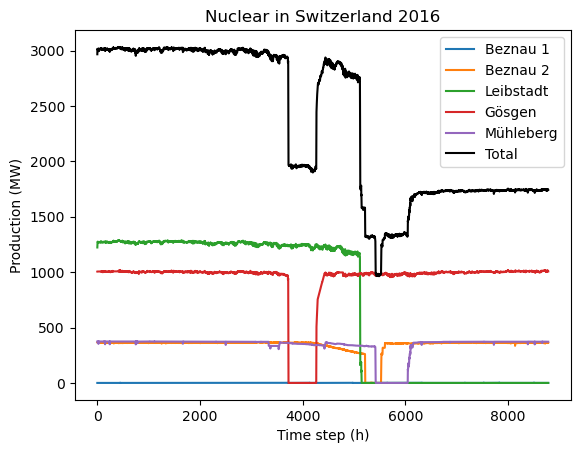

In [8]:
for gen, label in gen_CH.items():
    if gen in data:
        plt.plot(data[gen], label=label)
plt.plot(total_CH, label='Total', color='black')
plt.legend(loc='upper right')
plt.xlabel('Time step (h)')
plt.ylabel('Production (MW)')
plt.title('Nuclear in Switzerland %d' % year)
plt.show()

## Export all nuclear profiles

In [9]:
df = pd.DataFrame(data).T
df.index.name = 'Name'
df

,0,1,2,3,4,5,6,7,8,9,...,8774,8775,8776,8777,8778,8779,8780,8781,8782,8783
Name,,,,,,,,,,,,,,,,,,,,,
ALMARAZ 1,983.400000,982.600000,982.100000,980.600000,980.600000,979.900000,980.300000,980.300000,979.60000,979.500000,...,1006.70,1006.20,1006.50,1006.80,1006.30,1006.00,1006.60,1006.40,1006.30,1006.30
ALMARAZ 2,1008.700000,1007.800000,1008.200000,1007.800000,1007.900000,1007.600000,1007.900000,1007.800000,1007.40000,1007.800000,...,1011.60,1011.10,1011.70,1012.00,1011.60,1011.30,1011.50,1012.00,1012.10,1013.30
ASCO 1,1005.800000,1004.900000,1004.400000,1000.800000,1001.100000,1000.500000,1001.200000,1001.100000,1001.40000,1001.100000,...,1002.40,1002.80,1002.60,1003.60,1006.70,1007.30,1007.60,1006.50,1006.60,1004.30
ASCO 2,1003.600000,1003.500000,1003.000000,999.400000,999.900000,999.400000,999.900000,1000.300000,999.80000,1000.100000,...,997.50,996.90,997.10,997.80,1000.70,1001.70,1001.40,1000.80,1000.40,998.60
BELLEVILLE 1,1297.000000,1290.000000,1289.000000,1289.000000,1286.000000,1286.000000,1283.000000,1281.000000,1257.00000,1250.000000,...,1304.00,1312.00,1312.00,1312.00,1312.00,1312.00,1312.00,1312.00,1312.00,1312.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRICASTIN 3,830.000000,855.000000,859.000000,906.000000,917.000000,906.000000,924.000000,924.000000,929.00000,938.000000,...,809.00,807.00,805.00,804.00,804.00,804.00,804.00,804.00,804.00,804.00
TRICASTIN 4,830.000000,947.000000,947.000000,948.000000,947.000000,948.000000,936.000000,947.000000,937.00000,947.000000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TRILLO,999.600000,999.700000,999.600000,999.500000,999.800000,999.500000,999.700000,999.500000,999.70000,1000.100000,...,997.20,997.20,997.30,997.50,997.30,997.90,997.00,997.70,996.70,997.20


In [10]:
# df.to_csv('data/entsoe_nuclear_2016.csv')

## PanTaGruEl export

In [11]:
import json
import numpy as np

In [12]:
with open('../models/europe.json') as file:
    network = json.load(file)

In [13]:
gen_ids = [int(id) for id, gen in network['gen'].items() if any(name in data.keys() for name in gen['entsoe_names'])]
gen_ids.sort()
len(gen_ids)

44

In [14]:
gen_pmax = np.array([100 * network['gen'][str(id)]['pmax'] for id in gen_ids])

In [15]:
gen_series = np.array([sum(ts.make_364_periodic(data[name], year=year, verbose=False) for name in network['gen'][str(id)]['entsoe_names'])
                
                       for id in gen_ids])
gen_series.shape

(44, 8736)

In [16]:
gen_series_max = gen_series.max(axis=1)

In [17]:
gen_series_max / gen_pmax

array([1.01587541, 0.8513535 , 1.03362289, 0.78214286, 1.08341969,
       1.01538971, 1.00205674, 0.99256776, 1.02513168, 1.02021028,
       1.0193323 , 1.0173617 , 0.98465909, 0.99145   , 1.00435106,
       0.92822695, 1.0475    , 1.00601027, 1.01566667, 1.01391534,
       0.99923664, 0.99453552, 1.02115385, 1.01103679, 1.0136612 ,
       1.02486339, 0.98876404, 0.75139665, 1.01825843, 1.01335878,
       0.99360902, 0.73082707, 1.00622711, 0.99442308, 1.00911602,
       1.00648855, 1.02125793, 1.01694215, 1.05655738, 1.0080429 ,
       1.00891089, 0.50547945, 1.01277099, 0.98345865])

In [18]:
gen_scaling = gen_pmax / gen_series_max
gen_scaling = np.where(gen_scaling < 1., gen_scaling, 1.)

In [19]:
gen_scaling

array([0.98437268, 1.        , 0.96747083, 1.        , 0.92300335,
       0.98484355, 0.99794748, 1.        , 0.97548444, 0.98019008,
       0.98103435, 0.98293458, 1.        , 1.        , 0.99566779,
       1.        , 0.95465394, 0.99402563, 0.98457499, 0.98627564,
       1.        , 1.        , 0.97928437, 0.98908369, 0.98652291,
       0.9757398 , 1.        , 1.        , 0.98206897, 0.98681733,
       1.        , 1.        , 0.99381143, 1.        , 0.99096633,
       0.99355328, 0.97918456, 0.98334011, 0.94647013, 0.99202128,
       0.99116781, 1.        , 0.98739005, 1.        ])

In [20]:
gen_series_rescaled = gen_scaling.reshape((-1,1)) * gen_series

In [21]:
gen_series_rescaled.max(axis=1) / gen_pmax

array([1.        , 0.8513535 , 1.        , 0.78214286, 1.        ,
       1.        , 1.        , 0.99256776, 1.        , 1.        ,
       1.        , 1.        , 0.98465909, 0.99145   , 1.        ,
       0.92822695, 1.        , 1.        , 1.        , 1.        ,
       0.99923664, 0.99453552, 1.        , 1.        , 1.        ,
       1.        , 0.98876404, 0.75139665, 1.        , 1.        ,
       0.99360902, 0.73082707, 1.        , 0.99442308, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.50547945, 1.        , 0.98345865])

In [22]:
pantagruel_df = pd.DataFrame(gen_series_rescaled)
pantagruel_df.insert(0, 'id', gen_ids)
pantagruel_df

,id,0,1,2,3,4,5,6,7,8,...,8726,8727,8728,8729,8730,8731,8732,8733,8734,8735
0,79,1970.418797,1970.517235,1970.615672,1970.615672,1970.221923,1968.942238,1969.828174,1969.926611,1970.418797,...,1970.123485,1970.221923,1969.926611,1970.221923,1971.009421,1970.025048,1969.631299,1970.418797,1970.517235,1970.517235
1,87,1062.400000,1062.300000,1062.900000,1062.900000,1063.600000,1063.100000,1063.100000,1063.300000,1062.900000,...,1064.200000,1063.700000,1063.900000,1063.400000,1063.300000,1063.100000,1064.000000,1063.300000,1063.000000,1062.400000
2,160,975.113852,975.404093,975.791082,975.887829,975.694335,975.500840,975.887829,975.210599,975.500840,...,1901.080186,1836.646628,1668.693692,1495.419666,1336.077220,1228.784704,1132.811598,1047.577417,980.338195,975.113852
3,176,929.400000,927.900000,929.100000,929.300000,928.800000,929.500000,930.100000,929.900000,929.400000,...,932.100000,931.500000,931.300000,931.700000,931.300000,931.000000,930.700000,929.900000,929.600000,929.600000
4,179,1914.308943,1914.308943,1914.308943,1914.308943,1914.308943,1914.308943,1914.308943,1914.308943,1914.308943,...,1914.308943,1914.308943,1914.308943,1914.308943,1914.308943,1914.308943,1914.308943,1914.308943,1914.308943,1914.308943
5,209,1274.289066,1273.599676,1247.698290,1276.849659,1277.342081,1277.637534,1309.940402,1334.364522,1355.046237,...,1263.160334,1276.849659,1276.849659,1264.243662,1258.728538,1276.455722,1275.470878,1277.637534,1273.205738,1273.107254
6,210,1208.244957,1208.244957,1207.865737,1207.865737,1207.865737,1207.865737,1206.298960,1210.689929,1204.871895,...,1212.087055,1211.538184,1210.809682,1210.689929,1210.640031,1230.199802,1210.640031,1210.260811,1210.240852,1208.444547
7,232,1364.000000,1361.730000,1355.300000,1353.000000,1359.550000,1359.300000,1372.880000,1377.980000,1372.150000,...,1370.580000,1371.650000,1369.600000,1364.400000,1362.800000,1369.200000,1366.430000,1369.650000,1361.780000,1363.500000
8,249,1272.714548,1274.665517,1274.372871,1273.007193,1274.372871,1280.420875,1320.903479,1321.878964,1321.586318,...,1281.884102,1282.079198,1288.322299,1299.150176,1295.540884,1296.223723,1296.126174,1298.564885,1293.980109,1290.956107
9,256,1203.477385,1203.379366,1203.085309,1202.301157,1200.830871,1200.242757,1199.948700,1198.772472,1198.184358,...,1202.889271,1202.301157,1202.301157,1202.595214,1202.203138,1202.693233,1202.595214,1203.085309,1203.281347,1203.477385


In [23]:
pantagruel_df.to_csv('data/europe_nuclear_%d.csv' % year, index=False)